# Resumo, Teoria e Prática - Equações Diferenciais
> Autores: Rafael, Gil, Matheus, Karina, Felipe<br>
> Fontes bibliográficas:
* Rosa, R. (2017). <i>Equações Diferenciais</i>
* Trefethen, L. & Bau, D. (1997) <i>Numerical Linear Algebra</i>
* Keith R. Symon (1988) <i>Mecânica</i>

---
## O que é uma EDO

> > > > > Equações Diferenciais estão presentes em diversos modelos em física, química, biologia, economia, engenharia, etc. Vários fenômenos envolvem a variação de uma quantidade em relaçao a outra, levando naturalmente a modelos baseados em equações diferenciais. Podemos ter variações temporais de, por exemplo, a posição de um objeto, a temperatura de um material, a concentração de um agente químico, a concentração de um poluente ou nutriente em um meio, a umidade do ar, o número de habitantes de uma cidade, a densidade de bactérias de uma cultura, a densidade de massa de um gás, o valor de uma mercadoria, o câmbio entre moedas, o produto interno bruto de um país, etc. Além de variações temporais dessas quantidades, podemos ter variações em relação a outras quantidades, como variação de temperatura em relação à posição e variação de densidade de massa de um fluido em relação à temperatura, por exemplo.




> > > > > As equações diferenciais são expressões matemáticas de certas leis envolvidas em uma modelagem, que podem, por exemplo, ser leis fundamentais, como a segunda lei de Newton, empíricas, como em reações químicas, ou heurísticas, como em dinâmica populacional.
<br><br><br>
Uma equacão diferencial  é uma equação cuja incógnita é uma função e cuja equação envolve derivadas dessa função procurada. Mais especificamente, consideramos uma equação da forma
$$
F\left(t,x,\frac{\mathrm{d}x}{\mathrm{d}t}, \dots, \frac{\mathrm{d}^nx}{\mathrm{d}t^n} \right) = 0
$$
onde $t$ é uma variável independente, $F = F (t, x, x_1,\dots, x_n) $ é uma função $F: \mathbb{R}^{n+2} \to \mathbb{R}$ e $x = x(t)$ é uma variável dependente, que é a função procurada (incógnita). Esta é uma equação de ordem $n$, indicando a derivada de ordem mais alta presente na equação.

REFERÊNCIA: Ricardo Rosa  . **Equações Diferenciais **, 2017.<br>
http://www.labma.ufrj.br/~rrosa/dvifiles/apostila-ed-maio2017.pdf


Cédric Villani, Medalha Fields, falando sobre motivação e utilidade das equações diferenciais (em inglês com legendas)
https://www.youtube.com/watch?v=o9zQpQjfQ80


### Uma descrição mais 'ingênua'
Equações diferenciais são equações que modelam vários fenomenos do mundo em que vivemos, essas equações estão ligadas a maneira que esses fenomenos mudam. Quando dizemos que queremos resolver uma equação diferencial, é por que queremos descobrir como esse fenomeno ocorre, ou como estará no futuro mas sabemos apenas como ele muda, seja como ele muda a cada minuto como por exemplo a chuva que vai ficando mais forte ou mais fraca, ou se muda a cada lugar diferente que está sendo observado, por exemplo medir a temperatura próximo do ar condicionado numa sala ou longe do ar na mesma sala.

In [0]:
# Bibliotecas do Python para auxiliar nos metódos númericos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy
from sympy import Function, dsolve, Eq, Derivative, symbols, init_printing, plot, Matrix, exp, solve, linsolve

def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sympy.printing.latex(exp,**options)
init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

---
## Alguns modelos de EDOs:

### Taxa de Decaimento:
Vamos primeiro olhar para um EDO bem simples, que modela decaimento radioativo com uma massa inicial $y_0$ e coeficiente de decaimento $\lambda$ que depende do elemento observado.
$$\frac{\mathrm{d}x}{\mathrm{d}t}=-\lambda x$$

Solução númerica com $y_0 = 50, \lambda = 0.3$

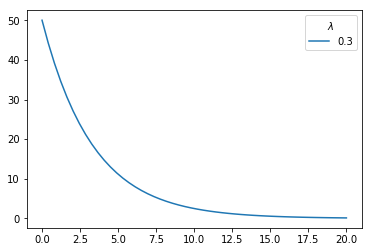

In [0]:
def model1(y, t, k):
  # modelo para decaimento radioativo
  return -k*y

ts = np.linspace(0,20)
ys = odeint(model1,50,ts,args=(0.3,))
plt.plot(ts,ys,label=0.3)
plt.legend(title='$\lambda$')
plt.ylabel=('massa')
plt.xlabel=('tempo')
plt.show()

Aqui podemos ver o 'poder' de modelagem de uma EDO, o gráfico nos diz que: Um elemento com massa 50 levará 20 unidades de tempo para chegar a uma massa 0.

Agora vamos observar que alterando o coeficiente $\lambda$, obtemos uma nova solução, para isso segue um plot com $\lambda$ variando de 0.1 a 0.5

para $\lambda \in R$ uma constante definida pelo elemento observado

Então utilizando este modelo para uma massa inicial de 50kg, variando os valores de $\lambda$


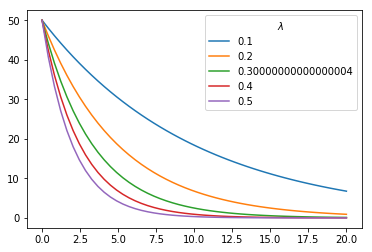

In [0]:
lambdas = np.linspace(0.1,0.5,num=5)
ts = np.linspace(0,20)
for l in lambdas:
  ys = odeint(model1,50,ts,(l,))
  plt.plot(ts,ys,label=str(l))
plt.legend(title='$\lambda$')
plt.ylabel=('massa')
plt.xlabel=('tempo')
plt.show()

## EDOs de Ordem Superior - Soluções Analíticas

### Massa-Mola sem amortecimendo, ou oscilador harmônico simples

Vamos olhar para a modelagem do sistema massa-mola, novamente temos uma EDO a ser resolvida.

$$
m\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} = -kx\\
\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} = -\frac{k}{m}x
$$
Para ter um pouco de intuição física e algébrica sobre com o que estamos lidando, vamos fazer a seguinte mudança de varíaveis: $\omega_0 = \sqrt{\frac{k}{m}}$<br>
O motivo ficará claro quando chegarmos a solução.<br>
Portanto agora nossa EDO tem a seguinte cara
$$
\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} = -\omega_0^2x \tag{1}
$$

### Resolvendo eq. (1)
$$
\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} = -\omega_0^2x\\
\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} + \omega_0^2x = 0\\
$$
Tomando o operador linear $D^2$ da derivada
$$
(D^2+\omega_0^2I)x = 0\\
$$
Podemos olhar para $(D^2+\omega_0^2I)$ como um polinômio do segundo grau em D, e portanto fatorar
$$
(D-r_1I)(D-r_2I)x = 0\\
$$
Onde $r_n$ são as raízes do polinômio. Se chamarmos o termo $(D-r_2I)x = z$
$$
(D-r_2I)x = z\\
\therefore (D-r_1I)z = 0
$$
Mas esta é uma EDO de primeira ordem, a qual conhecemos a solução geral:
$$
(D-r_1I)z = 0\\
\frac{\mathrm{d}}{\mathrm{d}t}z - r_1z = 0\\
\therefore z = c_1 e^{r_1 t}
$$
Voltando na equação $(D-r_2I)x = z$
$$
(D-r_2I)x = z\\
\frac{\mathrm{d}}{\mathrm{d}t} x - r_2 x = c_1 e^{r_1 t}\\
e^{-r_2 t}(\frac{\mathrm{d}}{\mathrm{d}t} x - r_2 x) = (c_1 e^{r_1 t})e^{-r_2 t}\\
\frac{\mathrm{d}}{\mathrm{d}t}(e^{-r_2 t} x) =  c_1 e^{(r_1⁻r_2) t}\\
e^{-r_2 t} x = \frac{c_1}{r_1 - r_2} e^{(r_1⁻r_2) t}\\
\therefore x(t) = c_2 e^{r_1t} + c_3 e^{r_2 t}
$$
Com $r_1 \neq r_2$ <br>
A solução de $(D^2+\omega_0^2I) = 0$, claramente, é $r_1 = i\omega_0, r_2 = -i\omega_0$<br>
Temos então duas raízes complexas, vamos olhar para algumas propriedades dos complexos, seja $C \in \mathbb{C}$, chamamos de $C^*$ o conjugado complexo de $C$
$$
C = a + bi \\
C^* = a - bi\\
C + C^* = a\\
C - C^* = 2bi
$$
Tomando $c_2 = C, c_3 = C^*$, nossa solução se torna:
$$x(t) = C e^{i\omega_0t} + C^* e^{-i\omega_0t}$$
Passando $C$ para coordenadas polares
$$
C = r e^{i\theta} \\
C^* = r e^{-i\theta}\\
r = \sqrt{a^2 + b^2}\\
tg(\theta) = \frac{b}{a}\\
a = r cos(\theta)\\
b = r sen(\theta)\\
\theta \in \left[-\frac{\pi}{2},\dfrac{\pi}{2}\right]\\
$$
Para carregar menos a notação, chamaremos $r = \frac{1}{2}A$, podemos reescrever agora, usando a identidade de Euler:

$$
\begin{align}
x(t) &= \frac{1}{2}A e^{i\theta} e^{i\omega_0t} + \frac{1}{2}A e^{-i\theta}e^{-i\omega_0 t}\tag{sol 1} \\ 
& = \frac{1}{2}A e^{i(\omega_0t + \theta)} + \frac{1}{2}A e^{-i(\omega_0t + \theta)}\\
& = \frac{1}{2}A \big[cos(\omega_0t + \theta) + i sen(\omega_0t + \theta)\big] + \frac{1}{2} A \big[cos(\omega_0t + \theta) - isen(\omega_0t + \theta)\big] \\
& = \frac{1}{2}A \big[cos(\omega_0t + \theta) + i sen(\omega_0t + \theta) + cos(\omega_0t + \theta) - i sen(\omega_0t + \theta)  \big]\\
x(t) &= A cos(\omega_0t + \theta) 
\end{align}
$$
Onde temos um significado para cada valor:
$$
\begin{align}
A &\to \text{Amplitudade da curva senoidal} \\
\omega_0 &\to \text{Frequência Angular} \\
\theta &\to \text{Fase, ou defasagem da curva senoidal}
\end{align}
$$


### Massa Mola Amortecido

$$m\frac{d^2x}{dt^2}=-kx-\mu\frac{dx}{dt}$$

Seja $D$ um operador linear, podemos escrever:
$$(mD^2+\mu D+ kI)x=0$$

Então queremos $D$ tal que:
$$(mD^2+\mu D+ kI)=0$$

Achando as raízes temos:
$$D=-\frac{\mu}{2m}\pm \sqrt{\big(\frac{\mu}{2m}\big)^2-\frac{k}{m}}$$

#### Os três casos diferentes

Para as duas raízes acima temos três situações que resultam em diferentes tipos de amortecimento:

$$ 
1) \frac{k}{m}>(\frac{\mu}{2m})^2\\
2) \frac{k}{m}<(\frac{\mu}{2m})^2\\
3) \frac{k}{m}=(\frac{\mu}{2m})^2\\
$$
#### 1)Subamortecido

Temos que:
$$\frac{k}{m}>(\frac{\mu}{2m})^2$$
Aplicando uma mudança de variáveis:

$$\frac{\mu}{2m}=\gamma \\
\frac{k}{m}=\omega_0^2 \\
\sqrt{\omega_0^2-\gamma^2}=\omega_1$$

Então temos que $D=-\gamma \pm i\omega_1$

Voltando ao sistema para $r_1=-\gamma +i\omega_1$ e $r_2=-\gamma -i\omega_1$

$$(mD^2+\mu D+ kI)x=(D-r_1I)(D-r_2I)x=0$$

Fazendo o mesmo processo para o massa mola sem atrito temos:
$$x=c_1e^{r_1}+c_2e^{r_2} \\
x(t)=Ce^{(-\gamma + i\omega_1)t} + C^*e^{(-\gamma - i\omega_1)t} \\
e^{-\gamma t}(Ce^{i\omega_1t}+C^*e^{-i\omega_1t})$$ 

Então fora o fator  $e^{-\gamma t}$ voltamos ao caso anterior de massa mola, adotando a `sol 1` feita anteriormente chegamos em:

$$x(t)=Ae^{-\gamma t}\cos(\omega_1t+\theta)$$

Onde $A$ e $\theta$ dependem das condições inicias.

---

#### 2)Superamortecido
Temos que:
$$\frac{k}{m}<(\frac{\mu}{2m})^2$$

Aplicando uma mudança de variáveis:

$$\frac{\mu}{2m}=\gamma \\
\frac{k}{m}=\omega_0^2 $$

Temos que $D=-\gamma \pm \sqrt{\gamma^2-\omega_0^2}$

Tomando $r_1=-\gamma + \sqrt{\gamma^2-\omega_0^2}$ e $r_2=-\gamma - \sqrt{\gamma^2-\omega_0^2}$:
$$(D-r_1)(D-r_2)x = 0$$

Refazendo os mesmo passos anteriores:
$$x=c_1e^{r_1}+c_2e^{r_2} \\
x(t)=c_1e^{(-\gamma + \sqrt{\gamma^2-\omega_0^2})t}+c_2e^{(-\gamma - \sqrt{\gamma^2-\omega_0^2})t}$$

Sendo $\sqrt{\gamma^2-\omega_0^2}=a$ temos:

$$x(t)=e^{-\gamma t}(c_1e^{at}+c_2e^{-at})$$

Com $c_1$ e $c_2$ constantes que dependem das condições iniciais.

---

### 3)Criticamente Amortecido

Temos que:
$$\frac{k}{m}=(\frac{\mu}{2m})^2$$

Com a mesma mudança de variável feita anteriormente temos que $D=-\gamma$, então para $r=-\gamma$ temos:
$$(D-r)(D-r)x = 0$$
Tomando $(D-r)x = z$
$$(D-r)z = 0 \\
\frac{d}{dt}z - rz = 0\\
\frac{d}{dt}z =rz \\
z = c e^{r t}$$

Voltando a equação anterior:
$$(D-r)x = z\\
(D-r)x = c e^{r t}\\
e^{-r t}\big(\frac{d}{dt}x - rx\big)=c e^{r t}e^{-r t}\\
\frac{d}{dt}(e^{-r t}x)=c e^{(r-r)t}=c \\
e^{-r t}x=c_1 t+c_2 \\
x(t)=(c_1 t+c_2)e^{r t}$$

Então substituindo $r=-\gamma$ temos para $c_1$ e $c_2$ constantes que dependem das condições iniciais:
$$x(t)=(c_1 t+c_2)e^{-\gamma t}$$

### Redução de ordem de EDOs e suas soluções - um pouco de Álgebra Linear

Ao reduzir ordem de EDOs, representaremos as com matrizes, como observado nas soluções analiticas elas sempre carregam uma função, em geral a exponencial $e^x$ ou uma senoidal como $cosseno$, precisamos então discutir o que significa aplicar essa função a uma matriz.

#### Exponencial de uma Matriz

Relembrando a série de Taylor para a função exponencial $e^x$

$$\mathrm{e}^x = \sum_{n=0}^\infty \frac{x^n}{n!}$$
Então, seja A uma matriz, vamos ver se podemos escrever
$$\mathrm{e}^A = \sum_{n=0}^\infty \frac{A^n}{n!}$$

Como uma série é uma soma, a soma de matrizes é bem definida. multiplicar uma matriz por $\frac{1}{n!}, \forall n \in \mathbb{N}$ também está bem definido.

A operação $A^n$ nada mais é do que multiplicar a matriz A pela matriz A, n vezes. Logo como é uma multiplicação de matrizes iterada precisamos que A seja uma matriz quadrada, assim esta operação estará sempre definida. Logo para matrizes quadradas é perfeitamente possível fazer a operação $\mathrm{e}^A$

#### Um pouco mais de propriedades
Imaginemos uma matriz $A_{mxm}$, tal que A é diagonal
$$
\begin{pmatrix}
a_0 &0 &\dots &  0 \\
0 &a_1 &\dots & 0 \\
\vdots & 0 & a_j &0 \\
0 & 0 & \dots & a_m
\end{pmatrix}
$$
Então $A^n$ é dado por
$$
\begin{pmatrix}
a_0 &0 &\dots &  0 \\
0 &a_1 &\dots & 0 \\
\vdots & 0 & a_j &0 \\
0 & 0 & \dots & a_m
\end{pmatrix} \cdot \dots \cdot \begin{pmatrix}
a_0 &0 &\dots &  0 \\
0 &a_1 &\dots & 0 \\
\vdots & 0 & a_j &0 \\
0 & 0 & \dots & a_m
\end{pmatrix} = \begin{pmatrix}
a_0^n &0 &\dots &  0 \\
0 &a_1^n &\dots & 0 \\
\vdots & 0 & a_j^n &0 \\
0 & 0 & \dots & a_m^n
\end{pmatrix}
$$

Portanto a operação de exponencial de uma matriz se torna simplesmente, pelas propriedades de multiplicação por escalar e soma de matrizes
$$
\mathrm{e}^A = \sum_{n=0}^\infty \frac{A^n}{n!} = \begin{pmatrix}
e^{a_0} &0 &\dots &  0 \\
0 & e^{a_1} &\dots & 0 \\
\vdots & 0 & e^{a_j} &0 \\
0 & 0 & \dots & e^{a_m}
\end{pmatrix}  
$$

Reduzindo assim o custo computacional da operação.
O mesmo processo se dá para qualquer função $f(x)$ que precisemos aplicar a uma matriz, em especial estamos interessados também no $cosseno$

Esses últimos fatos podem ser aplicados na resolução de sistemas de equações diferenciais. Vamos tomar como exemplo a Lei de Hooke, que modela o comportamento de um sistema massa-mola em certas condições. A lei afirma que a força elástica de uma mola é diretamente proporcional a quanto ela está distendida ou comprimida. Isso é:

$$\textrm{Força elástica} = -kx$$

Ignorando forças externas, pela segunda lei de Newton temos que:

$$m\frac{\mathrm{d}^2x}{\mathrm{d}t^2} = -kx$$

$$\frac{\mathrm{d}^2x}{\mathrm{d}t^2} = -\frac{k}{m}x$$

Podemos reescrever essa equação como um sistema de equações de 1ª. ordem:

$$\begin{cases} 
\frac{\mathrm{d}x}{\mathrm{d}t} = v\\ 
\frac{\mathrm{d}v}{\mathrm{d}t} = -\frac{k}{m}x\end{cases}$$

Esse sistema, por sua vez, pode ser escrito em uma notação matricial:

$$\frac{\mathrm{d}y}{\mathrm{d}t} = Ay$$

onde

$$y = \
\begin{bmatrix}
x\\
v\\
\end{bmatrix},\\
A = \
\begin{bmatrix}
0&1\\
-\frac{k}{m}&0\\
\end{bmatrix}$$

Nessa altura, uma pergunta deve ser feita: Qual o propósito disso tudo? A que fim serve reescrever o problema original como um sistema de equações ou denotá-lo matricialmente? Para responder essa pergunta, vamos reproduzir a equação em questão após todas essas transformações:

$$\frac{\mathrm{d}y}{\mathrm{d}t} = Ay$$

Uma coisa salta aos olhos: Nosso modelo de sistema massa-mola, reescrito matricialmente, parece idêntico ao modelo malthusiano de crescimento populacional. Não é preciso um grande salto da imaginação para concluir, agora, que podemos usar a mesma solução familiar de um problema no outro:

$$y = \mathrm{e}^{At}y_0$$

Encontrar uma solução se resume essencialmente, então, em computar essa exponencial. Em um primeiro momento, pode parecer que nossa única opção é aproximá-la com os primeiros termos da série de Taylor, mas há uma opção melhor, realizando uma transformação chamada *diagonalização*.

#### Diagonalização

Digamos que $A_{2 \mathrm{x} 2}$ é uma matriz com dois autovetores, $x_1$ e $x_2$. Seja $V$ uma matriz cujas colunas são formadas pelos autovetores de $A$:

$$V = \
\begin{bmatrix}
x_1&x_2\\
\end{bmatrix}$$

A partir dessas definições podemos calcular:

$$AV = \
\begin{bmatrix}
Ax_1&Ax_2\\
\end{bmatrix} = \
\begin{bmatrix}
\lambda_1x_1&\lambda_2x_2\\
\end{bmatrix}$$

Onde $\lambda_1$ e $\lambda_2$ são os autovalores associados. Essa relação ainda pode ser destrichada em:

$$\begin{bmatrix}
\lambda_1x_1&\lambda_2x_2\\
\end{bmatrix} = \
\begin{bmatrix}
x_1&x_2\\
\end{bmatrix} \
\begin{bmatrix}
\lambda_1&0\\
0&\lambda_2
\end{bmatrix}
$$

Assim:

$$AV = V\Lambda$$

Onde $\Lambda = \begin{bmatrix}
\lambda_1&0\\
0&\lambda_2
\end{bmatrix}$ é a matriz de autovalores.

O resultado verdadeiramente interessante aqui é o fato de a matrix $\Lambda$ ser *diagonal*.

Vamos voltar alguns passos e pensar em nosso problema original: Como podemos aplicar isso ao problema de exponenciação?  Vamos ver o que acontece quando substituimos uma matriz por sua forma diagonalizada em uma exponenciação:

$$\mathrm{e}^{At} = \mathrm{e}^{V\Lambda V^{-1}t}$$

Expandindo pela série de Taylor:

$$\mathrm{e}^{At} = I + V\Lambda V^{-1}t + \frac{1}{2}V\Lambda^2V^{-1}t^2 + ...$$

$$\mathrm{e}^{At} = V(I + \Lambda t + \frac{1}{2}\Lambda^2t^2 + ...)V^{-1}$$

$$\mathrm{e}^{At} = V\mathrm{e}^{\Lambda t}V^{-1}$$

Aqui, podemos aplicar o resultado da exponenciação de matrizes diagonais:

$$\mathrm{e}^{At} = V\begin{bmatrix}
e^{\lambda_1} &0 &\dots &  0 \\
0 & e^{\lambda_2} &\dots & 0 \\
\vdots & 0 & e^{\lambda_j} &0 \\
0 & 0 & \dots & e^{\lambda_m}
\end{bmatrix} V^{-1}$$

---

Com essas conclusões, podemos *finalmente* computar uma solução para o problema de Hooke:<br>
Definindo problema de forma matricial:

In [0]:
k, m, t = symbols('k, m, t')
A = Matrix([
    [0, 1],
    [-k/m, 0]
])
A

⎡ 0   1⎤
⎢      ⎥
⎢-k    ⎥
⎢───  0⎥
⎣ m    ⎦

Computando matrizes de autovetores e autovalores

In [0]:
P, D = A.diagonalize()
P, D

⎛⎡   -1          1    ⎤  ⎡     _____           ⎤⎞
⎜⎢─────────  ─────────⎥  ⎢    ╱ -k             ⎥⎟
⎜⎢    _____      _____⎥  ⎢-  ╱  ───       0    ⎥⎟
⎜⎢   ╱ -k       ╱ -k  ⎥  ⎢ ╲╱    m             ⎥⎟
⎜⎢  ╱  ───     ╱  ─── ⎥, ⎢                     ⎥⎟
⎜⎢╲╱    m    ╲╱    m  ⎥  ⎢                _____⎥⎟
⎜⎢                    ⎥  ⎢               ╱ -k  ⎥⎟
⎜⎣    1          1    ⎦  ⎢    0         ╱  ─── ⎥⎟
⎝                        ⎣            ╲╱    m  ⎦⎠

Solução para condição inicial [1,0]

In [0]:
(P*exp(D*t)*P**-1)*Matrix([1,0])

⎡                 _____           _____          ⎤
⎢                ╱ -k            ╱ -k            ⎥
⎢           t⋅  ╱  ───     -t⋅  ╱  ───           ⎥
⎢             ╲╱    m         ╲╱    m            ⎥
⎢          ℯ              ℯ                      ⎥
⎢          ──────────── + ─────────────          ⎥
⎢               2               2                ⎥
⎢                                                ⎥
⎢                 _____                     _____⎥
⎢                ╱ -k                      ╱ -k  ⎥
⎢    _____  t⋅  ╱  ───        _____  -t⋅  ╱  ─── ⎥
⎢   ╱ -k      ╲╱    m        ╱ -k       ╲╱    m  ⎥
⎢  ╱  ─── ⋅ℯ                ╱  ─── ⋅ℯ            ⎥
⎢╲╱    m                  ╲╱    m                ⎥
⎢────────────────────── - ───────────────────────⎥
⎣          2                         2           ⎦

A solução do problema inicial se encontra na primeira linha do vetor. Podemos aplicar o *solver* do sympy ao problema em sua forma original para confirmar que a solução encontrada está correta:

In [0]:
x = Function('x')
hooke = Eq(x(t).diff(t, 2), -(k/m)*x(t))
hooke

  2                 
 d          -k⋅x(t) 
───(x(t)) = ────────
  2            m    
dt                  

In [0]:
# Solução geral
sol = dsolve(hooke)

# Constantes da solução particular
eq1 = Eq(sol.subs(t, 0).rhs, 1)            # x (0) = 1
eq2 = Eq(sol.rhs.diff(t, 1).subs(t, 0), 0) # x'(0) = 0

C1, C2 = symbols('C1, C2')
v1, v2 = linsolve([eq1, eq2], [C1, C2]).args[0]

sol.subs({C1: v1, C2: v2})


              _____           _____
             ╱ -k            ╱ -k  
        t⋅  ╱  ───     -t⋅  ╱  ─── 
          ╲╱    m         ╲╱    m  
       ℯ              ℯ            
x(t) = ──────────── + ─────────────
            2               2      

---

### Soluções Númericas

#### Corpo em Queda livre com resistencia do ar
$$\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-g-\frac{\mu}{m}\frac{\mathrm{d}x}{\mathrm{d}t}$$
Para $g$,$\mu$ e $m$ constantes\\
Teremos na forma vetorial
$$
u = \begin{pmatrix} \frac{\mathrm{d}x}{dt} \\ x \end{pmatrix}
$$

Portanto podemos escrever como

$$
\frac{\mathrm{d}u}{\mathrm{d}t} = \begin{pmatrix} -g \\ \frac{\mathrm{d}x}{\mathrm{d}{t}} \end{pmatrix} + \begin{pmatrix} -\omega^2_1\frac{\mathrm{d}x}{\mathrm{d}{t}} \\ 0 \end{pmatrix}
$$
Sendo $g=9.8m/s^2$, $\mu=0.1$ e massa variando



In [0]:
def model3(u, t):
  xdot, x = u
  return np.array([x, -10-(0.1*xdot)/m])


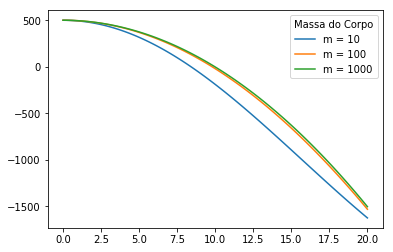

In [0]:
ts=np.linspace(0,20,num=100)
for m in [10,100,1000]:
  ys = odeint(model3,[500,0],ts)
  vs = [k[0] for k in ys]
  plt.plot(ts, vs, label='m = '+ str(m))
  
plt.legend(title='Massa do Corpo')
plt.ylabel=('Posição')
plt.xlabel=('Tempo')
plt.show()

#### Massa e Mola com resistencia do ar:
$$\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=\frac{-kx}{m}-\frac{\mu}{m}\frac{\mathrm{d}x}{\mathrm{d}t}$$
Para $k$ e $m$ constantes.

A função `odeint` da biblioteca `scipy` resolve edos de primeira ordem, precisamos então reduzir nosso problema para uma edo de primeira ordem, para tal iremos escrever nossa equação de forma vetorial, mas antes vamos deixar a notação mais compacta, chamando $\frac{k}{m} = \omega_0^2$ e $\frac{\mu}{m} = \omega_1^2$
$$
u = \begin{pmatrix} \frac{\mathrm{d}x}{dt} \\ x \end{pmatrix}
$$

Portanto podemos escrever como

$$
\frac{\mathrm{d}u}{\mathrm{d}t} = \begin{pmatrix} -\omega^2_0 \\ \frac{\mathrm{d}x}{\mathrm{d}{t}} \end{pmatrix} + \begin{pmatrix} -\omega^2_1\frac{\mathrm{d}x}{\mathrm{d}{t}} \\ 0 \end{pmatrix}
$$

Agora escrevemos um modelo de forma vetorial
Sendo $m=1kg$ e $\mu=0.1$ e k = $2$

In [0]:
def model2(u, t, omegas):
  xdot, x = u
  return [-omegas[0]*x-omegas[1]*xdot, xdot]

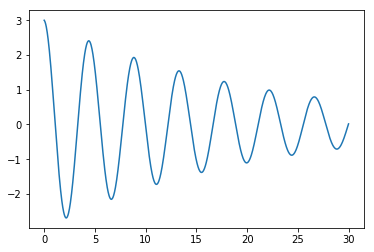

In [0]:
ts = np.linspace(0,30, num=1000)
ys = odeint(model2,[3,0],ts,([2,0.1],))
vs = [k[0] for k in ys]
plt.plot(ts, vs)
plt.ylabel=('$y(t)$')
plt.xlabel=('t')
plt.show()

Vamos fazer  a comparação da solução analitica e númerica para a EDO acima.
Temos que
$$x(t)=Ae^{-\gamma t}\cos(\omega_1t+\theta)$$

Onde 
$$
\gamma = \frac{\mu}{2m} = \frac{1}{20}\\
\omega_0 = \sqrt(\frac{k}{m}) = \sqrt(2)\\
\omega_1 = \sqrt(\omega_0^2 - \gamma^2) = \sqrt(2 - \left(\frac{1}{20}\right)^2)
$$

Como para $t=0, x(0) = 3$, teremos:
$$
A = 3\\
\theta = 0
$$

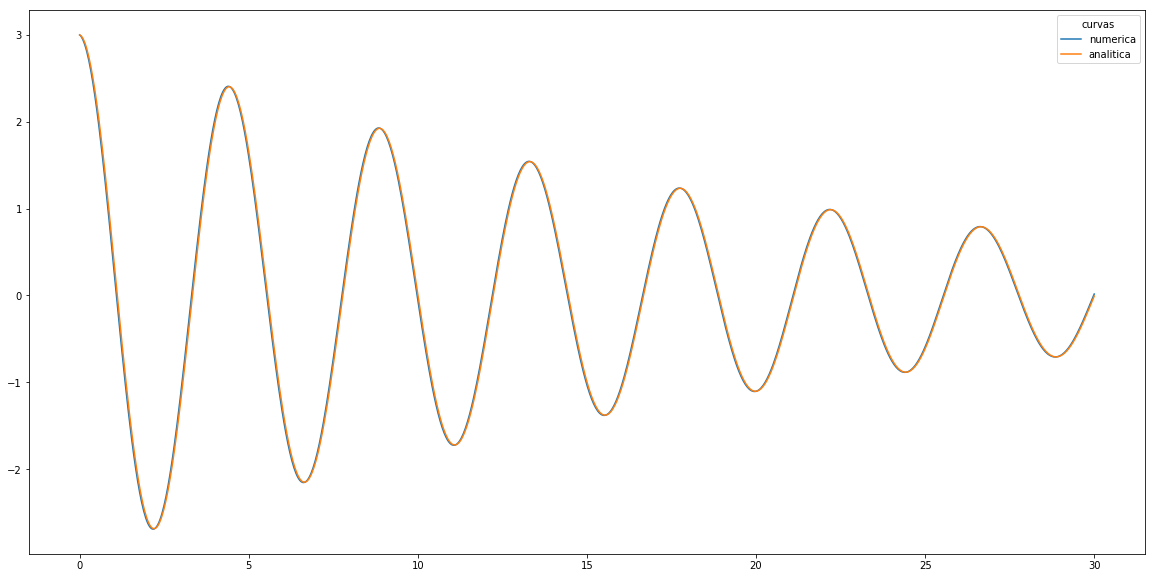

In [0]:
def sol(t):
  gamma = 1/20
  omg1 = np.sqrt(2-(1/20)**2)
  return 3*np.e**(-gamma*t)*np.cos(omg1*t + 0)

ts = np.linspace(0,30, num=1000)
ys = odeint(model2,[3,0],ts,([2,0.1],))
vs = [k[0] for k in ys]
plt.figure(figsize=(20,10))
plt.plot(ts, vs, label='numerica')
plt.plot(ts, sol(ts), label='analitica')
plt.legend(title='curvas')
plt.ylabel=('$y(t)$')
plt.xlabel=('t')
plt.show()

#### Gráfico de erro

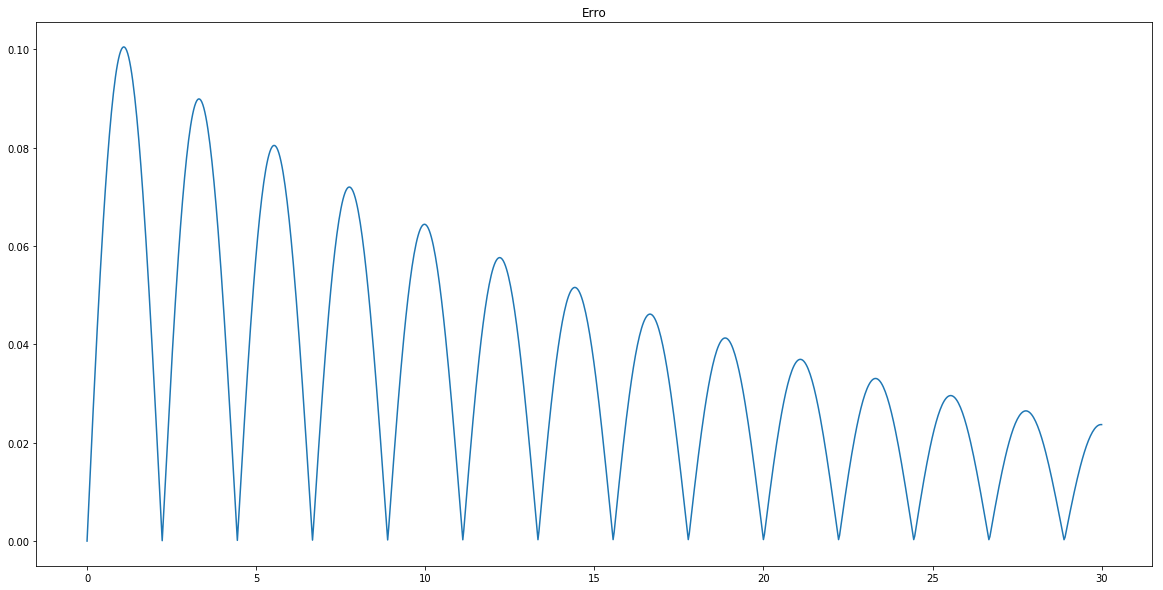

In [0]:
ts = np.linspace(0,30, num=1000)
ys = odeint(model2,[3,0],ts,([2,0.1],))
vs = [k[0] for k in ys]
plt.figure(figsize=(20,10))
plt.plot(ts, abs(vs-sol(ts)))
plt.ylabel=('err')
plt.xlabel=('t')
plt.title('Erro')
plt.show()

### Massa e Mola sem solução analítica:

Podemos utilizar do modelo anterior e adicionar uma nova força de modo que não seja possível calcular a solução de forma analítica do nosso problema, obrigando-nos a usar um método numérioco. Vamos supor o seguinte modelo:

$$\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=\frac{-kx}{m}-\frac{\mu}{m}\frac{\mathrm{d}x}{\mathrm{d}t} - \frac{ce^{-\frac{1}{c+1}x^2}}{m}$$


In [0]:
def ddf(x,dx,t):
  global k,u,c,m
  return -k*x/m -u*dx/m -c*np.exp(-(1/(c+1)*x**2))/m

x0=8
dx0=0

ts=np.linspace(0,20,10000)

def euler_segunda_ordem(f,ts,x0,dx0):
  xs=[x0]
  dxs=[dx0]
  tant=ts[0]
  for t in ts[1:]:
    h=t-tant
    dxs.append(dxs[-1] + f(xs[-1],dxs[-1],tant)*h)
    xs.append(xs[-1] + dxs[-2]*h + (f(xs[-1],dxs[-2],tant)*h**2)/2)
    tant=t
  return xs


Começando variando somente com o atrito cinético, sem nossa força exponencial:

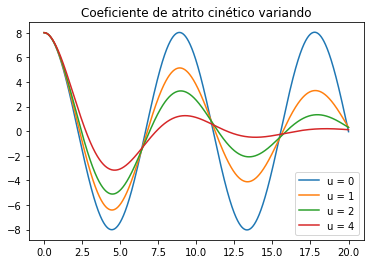

In [0]:
k=5
u=0
c=0
m=10

for uv in [0,1,2,4]:
  u=uv
  plt.plot(ts,euler_segunda_ordem(ddf,ts,x0,dx0),label="u = "+ str(uv))
plt.title("Coeficiente de atrito cinético variando")
plt.legend()
plt.show()


Agora, somente variando nossa força exponencial, sem o atrito cinético:

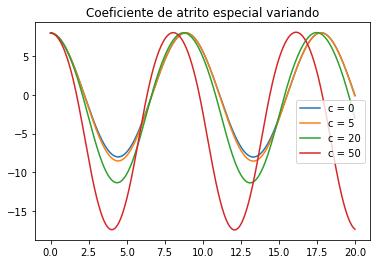

In [0]:
k=5
u=0
c=0
m=10

for cv in [0,5,20,50]:
  c=cv
  plt.plot(ts,euler_segunda_ordem(ddf,ts,x0,dx0),label="c = "+ str(c))
plt.title("Coeficiente de atrito especial variando")
plt.legend()
plt.show()

Juntando os dois, e variando o nosso atrito especial, temos:

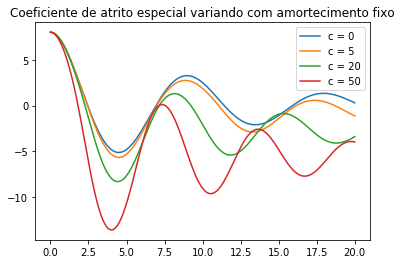

In [0]:
k=5
u=2
c=0
m=10

for cv in [0,5,20,50]:
  c=cv
  plt.plot(ts,euler_segunda_ordem(ddf,ts,x0,dx0),label="c = "+ str(c))
plt.title("Coeficiente de atrito especial variando com amortecimento fixo")
plt.legend()
plt.show()

E finalmente, variando ambos os coeficientes, o cinético e o exponencial:

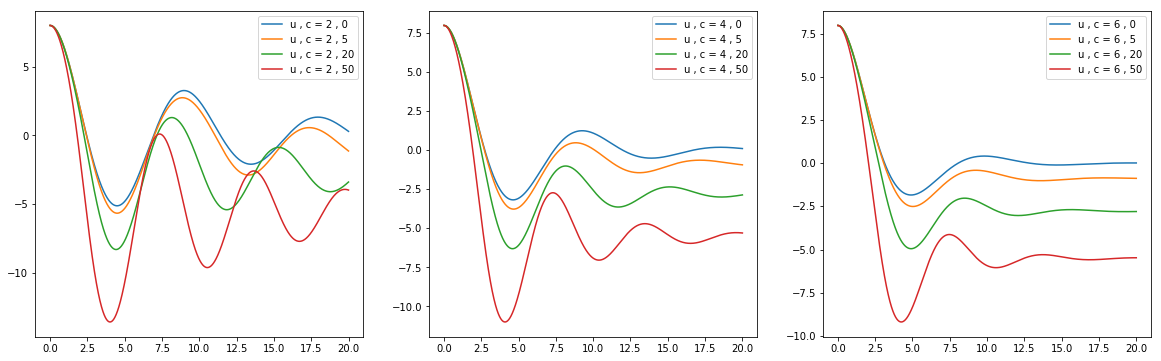

In [0]:
_, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(20,6))

for uv,a in enumerate([ax1, ax2, ax3]):
  u=(uv+1)*2
  for cv in [0,5,20,50]:
    c=cv
    a.plot(ts,euler_segunda_ordem(ddf,ts,x0,dx0),label="u , c = "+ str(u)+" , "+str(c))
    a.legend()
plt.show()
